In [1]:
# Importing required module
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings;warnings.filterwarnings('ignore');

In [2]:
# Reading Data
notes = pd.read_csv("D:\Ravi_Data\Banknotes.csv",sep=",")
print('Observations per class: \n',notes['class'].value_counts())
notes.head()

Observations per class: 
 0    762
1    610
Name: class, dtype: int64


,variace,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


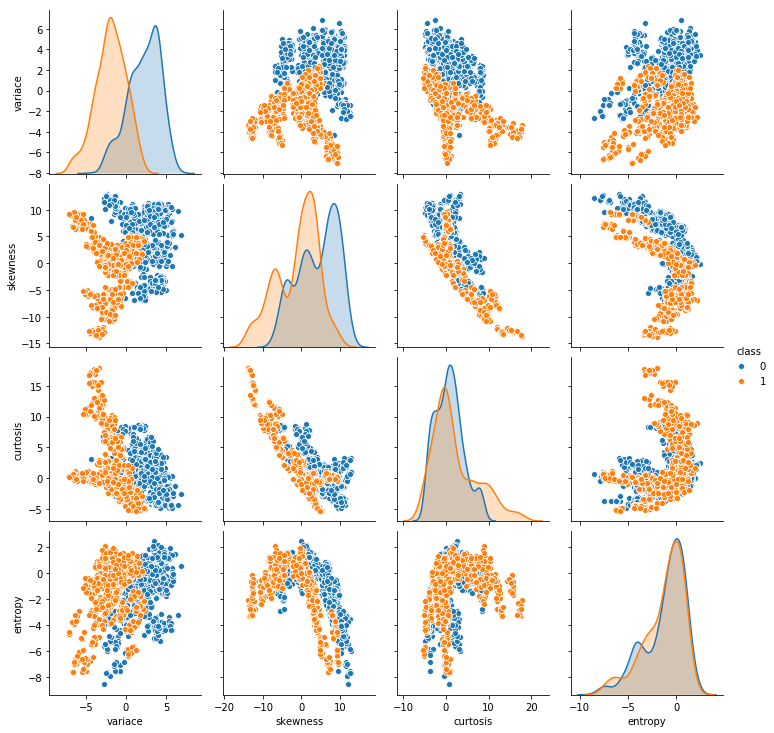

In [3]:
sns.pairplot(notes, hue='class') 
plt.show()

# Fake notes are in Orange color

In [4]:
# Import the sequential model and dense layer
from keras.models import Sequential
from keras.layers import Dense,Dropout

# Create a sequential model
model = Sequential()

# Add a dense layer 
model.add(Dense(2, input_shape=(4,), activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

# relu,softmax, tanh
# adam , RMSprop,sgd

# Compile your model
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

# Display a summary of your model
model.summary()


#from keras.models import load_modelmodel.save('model_file.h5')my_model = load_model('my_model.h5')predictions = my_model.predict(data_to_predict_with)probability_true = predictions[:,1]


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2)                 10        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 3         
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


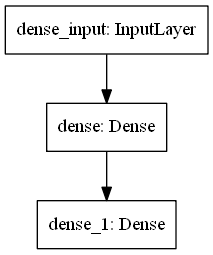

In [5]:
# Visualizing Model
from keras.utils import plot_model
import graphviz

# # Plot the model
plot_model(model, to_file='D:\Ravi_Data\model.png')

# # # # Display the image
# data = plt.imread('D:\Ravi_Data\model.png')
# plt.imshow(data)
# plt.show()

In [6]:
# loading sciki learn libraries and spliting data into test and train
from sklearn.model_selection import train_test_split
X = notes.drop(['class'],axis =1)
y = notes['class']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,stratify =y,shuffle=True,random_state = 111)

In [8]:
# Train your model for 20 epochs

from keras.callbacks import EarlyStopping
early_stop = EarlyStopping(patience=3)
details = model.fit(X_train,y_train, epochs = 300,validation_split = 0.2, 
                    callbacks = [early_stop],verbose = False)

In [9]:
# Evaluate your model accuracy on the test set
accuracy = model.evaluate(X_test,y_test)[1]
# Print accuracy
print('Accuracy:', round(accuracy,3))

9/9 [==============================] - 0s 1ms/step - loss: 0.0239 - accuracy: 0.9927
Accuracy: 0.993
